### Projeto - Intenção de Compra

É um projeto explorado no capitulo 11 do curso de Machine Learning da DSA. Aqui irei explorar os dados e fazer as minhas analise. 

link para o datset: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

import imblearn

In [119]:
dataframe = pd.read_csv('online_shoppers_intention.csv')

In [120]:
dataframe.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Informações do UCI

- Dataset possui 10 váriaveis númericos e 8 categóricos.
- Revenue é a váriavel target

#### Informações das variáveis

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" e "Product Related Duration" representa o número de diferentes tipos de páginas visitadas pelo visitante naquela sessão e tempo total gasto em cada dessa categoria
- "Bounce Rate", "Exit Rate" and "Page Value" representa métricas medidas pelo Google Analytics for cada página dentro da e-commerce site
- "Bounce Rate" porcentagem de visitantes que entrou no site através daquela página e depois saem sem acionar outras solicitações ao servidor de análise.
- "Exit Rate" váriavel específico para uma página web é calculado para todas as visualizações da página, a porcentagem que foi a última na sessão
- "Page Value" representa valor médio de uma página da web que o usuário visitou antes de concluir uma transação de comércio eletrônico. 
- "Special Day" horário proximado do horário de visita do site a um dia especial em que as sessões têm maior probilidade de serem finalzadas com transação

# Análise 

In [121]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

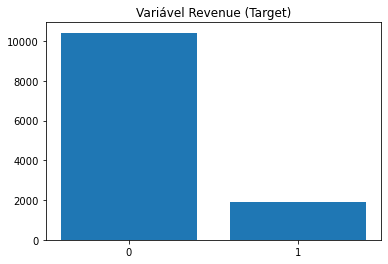

In [122]:
# Gráfico Target
plt.bar(height=dataframe["Revenue"].value_counts().values[:], x=dataframe["Revenue"].value_counts().index)
plt.xticks([0,1])
plt.title('Variável Revenue (Target)');

In [123]:
# Observações com valoers NaN
bool_series = pd.isnull(dataframe["Administrative"])
dataframe[bool_series].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [124]:
# Drop de observações NaN
dataframe.dropna(inplace=True)
dataframe.reset_index(inplace=True)
dataframe.isna().sum().sum()

0

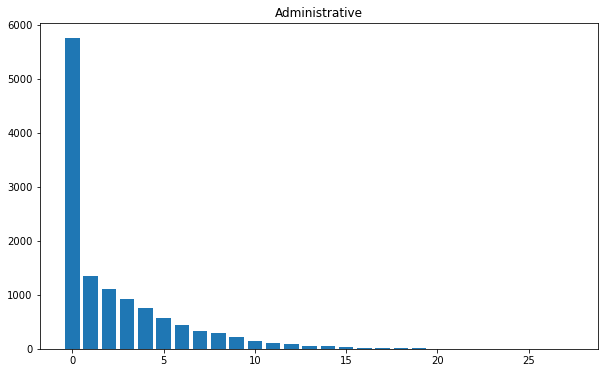

In [125]:
# Variável 'Administrative'
plt.figure(figsize=(10,6))
plt.bar(height=dataframe["Administrative"].value_counts().values, x=dataframe["Administrative"].value_counts().index)
plt.title('Administrative');

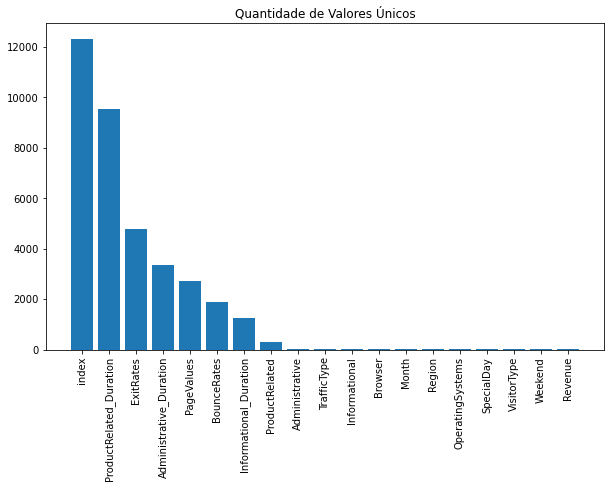

In [126]:
# Gráfico valores únicos
plt.figure(figsize=(10,6))
plt.bar(height=dataframe.nunique().sort_values(ascending=False), x=dataframe.nunique().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Quantidade de Valores Únicos");

In [127]:
# Variáveis categóricas e numérica
col_cat = []
col_num = []

for i in dataframe.columns:
    if dataframe[i].nunique() < 50:
        col_cat.append(i)
    else:
        col_num.append(i)

<AxesSubplot:>

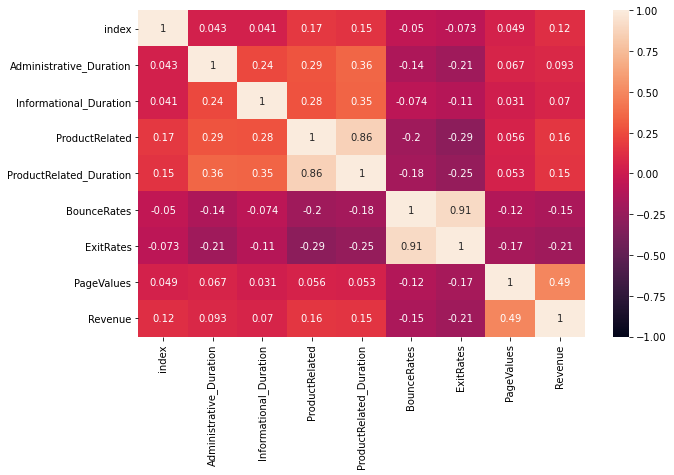

In [128]:
# Correlação
plt.figure(figsize=(10,6))
sns.heatmap(dataframe[col_num + ['Revenue']].corr(), vmax=1, vmin=-1, annot=True)

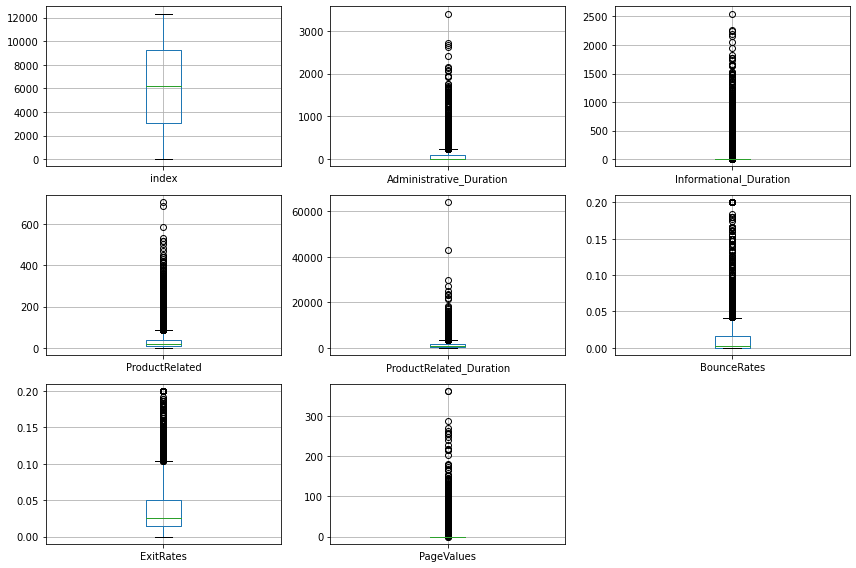

In [129]:
# Boxplots
plt.figure(figsize=(12,8))

for i,col in enumerate(col_num):
    
    plt.subplot(3,3,1+i)
    dataframe.boxplot(col)
    plt.tight_layout()

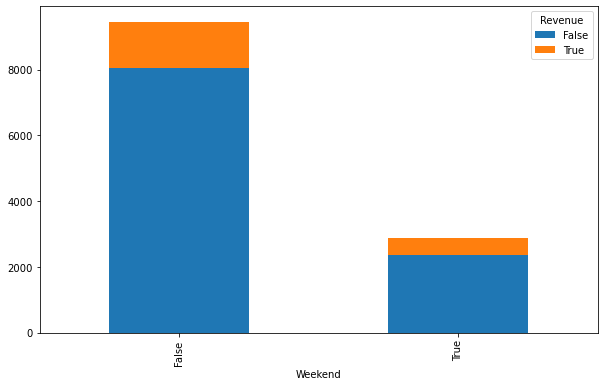

In [130]:
# Variável categórica ("Weekend") com a target "Revenue"
graf = pd.crosstab(dataframe['Weekend'], dataframe['Revenue']).plot(kind='bar', stacked=True, figsize=(10,6));

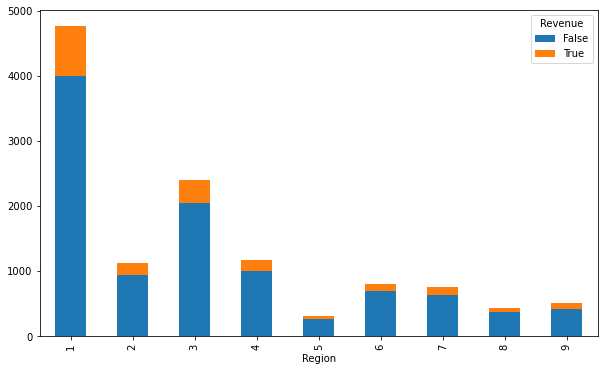

In [131]:
# Variável categórica ("Region") com a target "Revenue"
graf = pd.crosstab(dataframe['Region'], dataframe['Revenue']).plot(kind='bar', stacked=True, figsize=(10,6));

# Pré-Processamento

In [132]:
# Label enconder
label_enconder = LabelEncoder()
dataframe['VisitorType'] = label_enconder.fit_transform(dataframe['VisitorType'])
dataframe['Weekend'] = label_enconder.fit_transform(dataframe['Weekend'])
dataframe['Month'] = label_enconder.fit_transform(dataframe['Month'])

dataframe.head(3)

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,2,0,False
1,1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,2,0,False
2,2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,2,4,1,9,3,2,0,False


In [133]:
# One Hot Enconder - Separando variáveis categóricas em colunas
one_hot = OneHotEncoder(drop='first')

# Valores 
array_ohe = one_hot.fit_transform(dataframe[['VisitorType', 'Weekend', 'Month']]).toarray()

# Nomes colunas geradas
columns_ohe = one_hot.get_feature_names()

# Dataframe com novas colunas
df_ohe = pd.DataFrame(data= array_ohe, columns=columns_ohe)

C:\Users\Alvim Serrao\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [134]:
# Concatenação de dois dataframe
df_final = pd.concat([dataframe, df_ohe], axis=1)

In [135]:
# Separando x e y
x = df_final.drop(['Revenue'], axis=1)
y = df_final['Revenue']

In [140]:
# Balanceamento da variável target
smote = imblearn.over_sampling.SMOTE(random_state=2)

x_res, y_res = smote.fit_resample(x,y)

x_res.drop(['index'], inplace=True, axis=1)

In [141]:
# Divisão treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=.25, random_state=2)

In [142]:
# Padronização
std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# Algoritmo

In [143]:
# BaseLine
baseline_list = dataframe.shape[0]*[False]
acc = accuracy_score(dataframe['Revenue'], baseline_list)

df_resultado = pd.DataFrame([[acc, np.NAN, np.NAN, np.NAN, np.NAN]], 
                      columns= ['Acuracia', 'Precisao', 'Recall', 'F1', "AUC"],
                      index=['Base_Line'])

In [144]:
# Support Vector Machine
model_svm = SVC()

# Treinamento
model_svm.fit(x_train, y_train)

# Previsão
pred_svm = model_svm.predict(x_test)

# Métricas
acc_svm = accuracy_score(pred_svm, y_test)
prec_svm = precision_score(pred_svm, y_test)
rec_svm = recall_score(pred_svm, y_test)
f1_svm = f1_score(pred_svm, y_test)
auc_svm = roc_auc_score(y_test, pred_svm) # Ordem dos parâmetros IMPORTA

# Criação do df de resultados e valores da métricas geradas pelo SVM
svm_df = pd.DataFrame([[acc_svm, prec_svm, rec_svm, f1_svm, auc_svm]], 
                      columns= ['Acuracia', 'Precisao', 'Recall', 'F1', "AUC"],
                      index=['SVM'])

df_resultado = df_resultado.append(svm_df)

In [145]:
# Regressão Logística
model_reg = LogisticRegression(max_iter=3000)

# Treinamento
model_reg.fit(x_train, y_train)

# Previsão
pred_reg = model_reg.predict(x_test)

# Métricas
acc_reg = accuracy_score(pred_reg, y_test)
prec_reg = precision_score(pred_reg, y_test)
rec_reg = recall_score(pred_reg, y_test)
f1_reg = f1_score(pred_reg, y_test)
auc_reg = roc_auc_score(y_test, pred_reg) # Ordem dos parâmetros IMPORTA

# Valores da métricas geradas pela Regressão Logistica
reg_df = pd.DataFrame([[acc_reg, prec_reg, rec_reg, f1_reg, auc_reg]], 
                      columns= ['Acuracia', 'Precisao', 'Recall', 'F1', "AUC"],
                      index=['Regressao_Logistica'])

df_resultado = df_resultado.append(reg_df)

In [146]:
# Random Forest
model_forest = RandomForestClassifier()

# Treinamento
model_forest.fit(x_train, y_train)

# Previsão
pred_forest = model_forest.predict(x_test)

# Métrica
acc_forest = accuracy_score(pred_forest, y_test)
prec_forest = precision_score(pred_forest, y_test)
rec_forest = recall_score(pred_forest, y_test)
f1_forest = f1_score(pred_forest, y_test)
auc_forest = roc_auc_score(y_test, pred_forest) # Ordem dos parâmetros IMPORTA

# Valores da métricas geradas pelo Random Forest
forest_df = pd.DataFrame([[acc_forest, prec_forest, rec_forest, f1_forest, auc_forest]], 
                      columns= ['Acuracia', 'Precisao', 'Recall', 'F1', "AUC"],
                      index=['Random_Forest'])

df_resultado = df_resultado.append(forest_df)

In [147]:
# AdaBoost
model_ada = AdaBoostClassifier()

# Treinamento
model_ada.fit(x_train, y_train)

# Previsão
pred_ada = model_ada.predict(x_test)

# Métricas
acc_ada = accuracy_score(pred_ada, y_test)
prec_ada = precision_score(pred_ada, y_test)
rec_ada = recall_score(pred_ada, y_test)
f1_ada = f1_score(pred_ada, y_test)
auc_ada = roc_auc_score(y_test, pred_ada) # Ordem dos parâmetros IMPORTA

# Valores da métricas geradas pelo AdaBoost
ada_df = pd.DataFrame([[acc_ada, prec_ada, rec_ada, f1_ada, auc_ada]], 
                      columns= ['Acuracia', 'Precisao', 'Recall', 'F1', "AUC"],
                      index=['AdaBoost'])

df_resultado = df_resultado.append(ada_df)

In [148]:
# Bagging
model_bag = BaggingClassifier()

# Treinamento
model_bag.fit(x_train, y_train)

# Previsão
pred_bag = model_bag.predict(x_test)

# Métricas
acc_bag = accuracy_score(pred_bag, y_test)
prec_bag = precision_score(pred_bag, y_test)
rec_bag = recall_score(pred_bag, y_test)
f1_bag = f1_score(pred_bag, y_test)
auc_bag = roc_auc_score(y_test, pred_bag) # Ordem dos parâmetros IMPORTA

# Valores da métricas geradas pelo Bagging
bag_df = pd.DataFrame([[acc_bag, prec_bag, rec_bag, f1_bag, auc_bag]], 
                      columns= ['Acuracia', 'Precisao', 'Recall', 'F1', "AUC"],
                      index=['Bagging'])

df_resultado = df_resultado.append(bag_df)

In [149]:
df_resultado

,Acuracia,Precisao,Recall,F1,AUC
Base_Line,0.845080,NaN,NaN,NaN,NaN
SVM,0.912183,0.885544,0.941153,0.912502,0.913126
Regressao_Logistica,0.890469,0.843181,0.938767,0.888410,0.892144
Random_Forest,0.937548,0.946860,0.933333,0.940048,0.937218
AdaBoost,0.918332,0.929394,0.914108,0.921688,0.917940
Bagging,0.934666,0.938313,0.935532,0.936920,0.934536


#### Algoritmo que teve melhor perfomance foi o Random_Forest. Agora vai ser trabalhado seleção de variável e random search

In [48]:
# Listas de hiperparâmetros para serem testados
n_estimators = [50, 100, 200, 400 , 600, 800, 1000]
criterion = ['gini', 'entropy']
max_features = ['log2', 'sqrt']

# Dicionário com valores para Random Search
dict_param = {'n_estimators': n_estimators,
             'criterion': criterion,
             'max_features': max_features}

# Modelo
random_model = RandomizedSearchCV(estimator=model_forest, param_distributions=dict_param, n_iter=10, cv=4)

# Treino modelo
random_model.fit(x_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [50, 100, 200, 400, 600,
                                                         800, 1000]})

In [49]:
# Melhores parâmetros
random_model.best_params_

{'n_estimators': 600, 'max_features': 'log2', 'criterion': 'gini'}

In [54]:
# Modelo random forest com os melhores parâmetros
forest = RandomForestClassifier(n_estimators=600, max_features='log2', criterion='gini')

# Treinamento
forest.fit(x_train, y_train)

# Previsão
pred_forest = forest.predict(x_test)

# Métricas
acc_forest = accuracy_score(pred_forest, y_test)
prec_forest = precision_score(pred_forest, y_test)
rec_forest = recall_score(pred_forest, y_test)
f1_forest = f1_score(pred_forest, y_test)
auc_forest = roc_auc_score(y_test, pred_forest)

# DataFrame
pd.DataFrame([[acc_forest, prec_forest, rec_forest, f1_forest, auc_forest]], 
                      columns= ['Acuracia', 'Precisao', 'Recall', 'F1', "AUC"],
                      index=['Random Forest'])

,Acuracia,Precisao,Recall,F1,AUC
Random Forest,0.94043,0.950204,0.935602,0.922138,0.940084


#### Algoritmo se manteve nas métricas, apesar de ter utilizado Random Search para achar os melhores hiperparâmetros. Irei continuar utilizando o modelo afim de estudos e prática. 

In [175]:
# Loop variando a quantidade de variáveis preditora para o SelectKBest
for i in range(4,30,4):
    k_best = SelectKBest(score_func=f_classif, k=i)

    # Dataframes com as variáveis
    x_best = pd.DataFrame(x_train, columns=x_res.columns)
    x_best_test = pd.DataFrame(x_test, columns=x_res.columns)

    # Treinamento Kbest
    k_best.fit(x_best, y_train)

    # Instanciando algoritmo Random Forest
    forest = RandomForestClassifier(n_estimators=600, max_features='log2', criterion='gini')

    # Treinamento Random Forest
    forest.fit(x_best[k_best.get_feature_names_out()], y_train)

    # Previsão
    pred_forest = forest.predict(x_best_test[k_best.get_feature_names_out()])

    # Métricas
    acc_forest = accuracy_score(pred_forest, y_test)
    prec_forest = precision_score(pred_forest, y_test)
    rec_forest = recall_score(pred_forest, y_test)
    f1_forest = f1_score(pred_forest, y_test)
    auc_forest = roc_auc_score(y_test, pred_forest)

    print(f'Valor de k: {i}')
    print(f'\nAcúracia: {acc_forest}')
    print(f'Precisão: {prec_forest}')
    print(f'Recall: {rec_forest}')
    print(f'f1: {f1_forest}')
    print(f'AUC: {auc_forest}\n')
    print('*'*50)

Valor de k: 4

Acúracia: 0.8921983089930823
Precisão: 0.9108138238573021
Recall: 0.8841991341991342
f1: 0.8973091707852829
AUC: 0.8915390249409868

**************************************************
Valor de k: 8

Acúracia: 0.9265949269792467
Precisão: 0.9401709401709402
Recall: 0.9196655761541258
f1: 0.9298052186696069
AUC: 0.9261141211001936

**************************************************
Valor de k: 12

Acúracia: 0.9277478862413528
Precisão: 0.9401709401709402
Recall: 0.9216757741347905
f1: 0.930831493745401
AUC: 0.9273079133803368

**************************************************
Valor de k: 16

Acúracia: 0.9346656418139893
Precisão: 0.9479747305834262
Recall: 0.9272991639403854
f1: 0.9375229694965087
AUC: 0.9341942892869379

**************************************************
Valor de k: 20

Acúracia: 0.9350499615680246
Precisão: 0.9479747305834262
Recall: 0.9279738086576937
f1: 0.9378676470588235
AUC: 0.9345922200469856

**************************************************
Val

In [177]:
# Utilizando as melhores 24 variáveis preditora
k_best = SelectKBest(score_func=f_classif, k=24)

x_best = pd.DataFrame(x_train, columns=x_res.columns)
x_best_test = pd.DataFrame(x_test, columns=x_res.columns)

k_best.fit(x_best, y_train)

forest = RandomForestClassifier(n_estimators=600, max_features='log2', criterion='gini')

forest.fit(x_best[k_best.get_feature_names_out()], y_train)

pred_forest = forest.predict(x_best_test[k_best.get_feature_names_out()])

acc_forest = accuracy_score(pred_forest, y_test)
prec_forest = precision_score(pred_forest, y_test)
rec_forest = recall_score(pred_forest, y_test)
f1_forest = f1_score(pred_forest, y_test)
auc_forest = roc_auc_score(y_test, pred_forest)

print(f'\nAcúracia: {acc_forest}')
print(f'Precisão: {prec_forest}')
print(f'Recall: {rec_forest}')
print(f'f1: {f1_forest}')
print(f'AUC: {auc_forest}\n')


Acúracia: 0.940238278247502
Precisão: 0.950575994054255
Recall: 0.9349415204678363
f1: 0.9426939377188134
AUC: 0.9398721593828777



In [179]:
# 24 melhores features utilizados
k_best.get_feature_names_out()

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'x0_2', 'x1_1', 'x2_1',
       'x2_2', 'x2_5', 'x2_6', 'x2_7', 'x2_8'], dtype=object)